<p style="font-size:25px; color:green; font-weight:bold;">Pre-processing the data for Multimodal movie genre prediction </p>

In [ ]:
# Downloading the dataseet from Kaggle
# !kaggle datasets download -d rounakbanik/the-movies-dataset

In [69]:
# Importing the required imports
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import pandas as pd

In [70]:
# Reading the downloaded data
source_data = pd.read_csv('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/movies_metadata.csv')
pd.set_option('display.max_columns', None)
source_data.head(3)

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_3694/3302099659.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  source_data = pd.read_csv('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [72]:
# getting all the required columns from the source data
subset_data = source_data[['id', 'original_title', 'overview', 'tagline', 'genres', 'budget', 'popularity', 'release_date']]
print("subset_data (original) length is:", len(subset_data))

subset_data (original) length is: 45466


In [73]:
# Taking a look at the subsetted data
subset_data.head()

,id,original_title,overview,tagline,genres,budget,popularity,release_date
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,21.946943,1995-10-30
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,17.015539,1995-12-15
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,11.7129,1995-12-22
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,3.859495,1995-12-22
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10


In [75]:
# Converting the genre column into a list to find all the individual genre's count
existing_genres = subset_data['genres'].tolist()
existing_genres

["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 35, 'name': 'Comedy'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10

In [78]:
genre_per_movie = []
dict_genre = {}

# creating a list of genres that are commonly used genres
valid_genres = ['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 
'Thriller','Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Music', 'Documentary', 'Western']

for genres in existing_genres:
  genre = ast.literal_eval(genres)
  list_genre = []
  for x in genre:
    if x['name'] in valid_genres:
      list_genre.append(x['name'])
      if x['name'] in dict_genre:
        dict_genre[x['name']] += 1
      else:
        dict_genre[x['name']] = 1
  genre_per_movie.append(list_genre)
dict_genre = {key:value for key, value in dict_genre.items() if value != 1}
dict_genre

{'Animation': 1935,
 'Comedy': 13182,
 'Family': 2770,
 'Adventure': 3496,
 'Fantasy': 2313,
 'Romance': 6735,
 'Drama': 20265,
 'Action': 6596,
 'Crime': 4307,
 'Thriller': 7624,
 'Horror': 4673,
 'History': 1398,
 'Science Fiction': 3049,
 'Mystery': 2467,
 'War': 1323,
 'Music': 1598,
 'Documentary': 3932,
 'Western': 1042}

In [83]:
# Sorting the genre dictionary in ascending order based on the value
genre_dict_sorted = dict(sorted(dict_genre.items(), key=lambda item: item[1]))
genre_dict_sorted

{'Western': 1042,
 'War': 1323,
 'History': 1398,
 'Music': 1598,
 'Animation': 1935,
 'Fantasy': 2313,
 'Mystery': 2467,
 'Family': 2770,
 'Science Fiction': 3049,
 'Adventure': 3496,
 'Documentary': 3932,
 'Crime': 4307,
 'Horror': 4673,
 'Action': 6596,
 'Romance': 6735,
 'Thriller': 7624,
 'Comedy': 13182,
 'Drama': 20265}

In [84]:
# Creating two seperate lists from the dictionary for plotting them on a graph
keys = list(genre_dict_sorted.keys())
values = list(genre_dict_sorted.values())

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_3694/3920247406.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


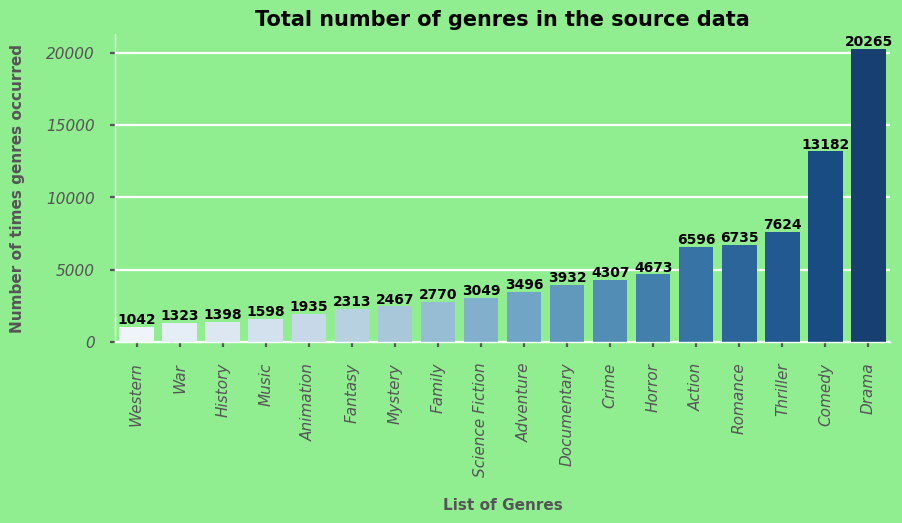

In [93]:
# Plotting the source data - to viusalise the number of genres and their count
style.use('seaborn-poster')
style.use('ggplot')

fig = plt.figure(figsize=(10, 4))
fig.patch.set_facecolor('lightgreen')

ax = fig.add_subplot(111)
ax.set_facecolor('lightgreen')
sns.barplot(x=keys, y=values, palette="Blues", ax=ax)
sns.despine(top=True)

for i, value in enumerate(values):
    ax.text(i, value + 0.8, str(value), ha='center', va='bottom', fontweight='bold')

plt.title("Total number of genres in the source data", size=15, fontweight='bold')
plt.xlabel('List of Genres', size=11, labelpad=15, fontweight='bold')
plt.ylabel('Number of times genres occurred', size=11, labelpad=15, fontweight='bold')
plt.xticks(size=11, rotation=90, style='italic')
plt.yticks(size=11, style='italic')

plt.show()

In [94]:
# Inserting the exploded genre list to the source data dataframe
subset_data['genre_list'] = genre_per_movie
subset_data.head()     

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_3694/675995725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['genre_list'] = genre_per_movie


,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_list
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,21.946943,1995-10-30,"[Animation, Comedy, Family]"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,17.015539,1995-12-15,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,11.7129,1995-12-22,"[Romance, Comedy]"
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,3.859495,1995-12-22,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,[Comedy]


In [35]:
# filtering from the subset_data to get only the individual genres. i.e., If a movie has one plus genre - we are not considering them
subset_data_with_one_genre = subset_data.loc[subset_data['genre_list'].apply(lambda x: len(x) == 1)]
subset_data_with_one_genre.head()

,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_list
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,[Comedy]
25,16420,Othello,The evil Iago pretends to be friend of Othello...,"Envy, greed, jealousy and love.","[{'id': 18, 'name': 'Drama'}]",0,1.845899,1995-12-15,[Drama]
35,687,Dead Man Walking,A justice drama based on a true story about a ...,NaN,"[{'id': 18, 'name': 'Drama'}]",11000000,6.891317,1995-12-29,[Drama]
39,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.894647,1995-12-15,[Drama]
52,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",0,1.361286,1994-01-01,[Drama]


In [36]:
# exploding the genre_list column to get the string values.
subset_data_with_one_genre['genre_list'] = subset_data_with_one_genre['genre_list'].explode()
subset_data_with_one_genre

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_88722/3599763537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data_with_one_genre['genre_list'] = subset_data_with_one_genre['genre_list'].explode()


,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_list
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,Comedy
25,16420,Othello,The evil Iago pretends to be friend of Othello...,"Envy, greed, jealousy and love.","[{'id': 18, 'name': 'Drama'}]",0,1.845899,1995-12-15,Drama
35,687,Dead Man Walking,A justice drama based on a true story about a ...,NaN,"[{'id': 18, 'name': 'Drama'}]",11000000,6.891317,1995-12-29,Drama
39,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.894647,1995-12-15,Drama
52,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",0,1.361286,1994-01-01,Drama
...,...,...,...,...,...,...,...,...,...
45444,44333,Les cartes vivantes,A bearded magician holds up a large playing ca...,NaN,"[{'id': 14, 'name': 'Fantasy'}]",0,0.208349,1905-01-01,Fantasy
45452,276895,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",NaN,"[{'id': 99, 'name': 'Documentary'}]",0,0.011025,1981-01-01,Documentary
45458,289923,The Burkittsville 7,A film archivist revisits the story of Rustin ...,"Do you know what happened 50 years before ""The...","[{'id': 27, 'name': 'Horror'}]",0,0.38645,2000-10-03,Horror
45459,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",0,0.661558,1995-01-01,Science Fiction


In [41]:
# getting the number of genres with the counts - for the individual genres
subset_data_with_one_genre_barPlotAxes = subset_data_with_one_genre.groupby('genre_list').size().reset_index(name='count')
subset_data_with_one_genre_barPlotAxes = subset_data_with_one_genre_barPlotAxes.sort_values('count')

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_88722/673566618.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


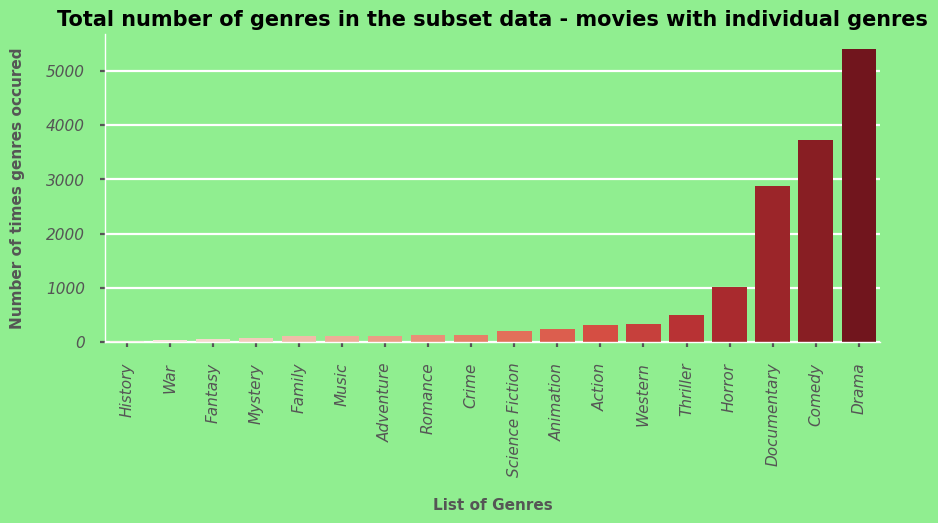

In [43]:
# Plotting the subset data - to viusalise the number of genres (individual genres) and thier count 

style.use('seaborn-poster')
style.use('ggplot')

fig = plt.figure(figsize=(10, 4))  
fig.patch.set_facecolor('lightgreen')

ax = fig.add_subplot(111)
ax.set_facecolor('lightgreen')

sns.barplot(x=subset_data_with_one_genre_barPlotAxes['genre_list'], y=subset_data_with_one_genre_barPlotAxes['count'], palette="Reds") 
sns.despine(top=True) 

plt.title("Total number of genres in the subset data - movies with individual genres", size=15, fontweight='bold')
plt.xlabel('List of Genres', size=11, labelpad=15, fontweight='bold')  
plt.ylabel('Number of times genres occured', size=11, labelpad=15, fontweight='bold') 
plt.xticks(size=11, rotation=90, style='italic')  
plt.yticks(size=11, style='italic')  

plt.show()  

In [52]:
# Counting the non-empty genre_list for movies with one genre
subset_data_with_one_genre = subset_data_with_one_genre[subset_data_with_one_genre['genre_list'].map(lambda d: len(d)) > 0]
print("Count of 'non-empty' genre_list values for movies with one genre:", len(subset_data_with_one_genre))

empty_count = 0
for genre in genre_per_movie:
  if not len(genre):
    empty_count += 1
print("Count of total empty count in genre_list from the source data is :", empty_count) 
print("The total count of the source data is :", len(subset_data))

Count of 'non-empty' genre_list values for movies with one genre: 15420
Count of total empty count in genre_list from the source data is : 2471
The total count of the source data is : 45466


<p style="font-size:25px; color:green; font-weight:bold;"> Using TMDb API to download the movie posters </p>

In [ ]:
!pip install tmdbv3api

from bs4 import BeautifulSoup
import os    
import requests
from tmdbv3api import Movie
from tmdbv3api import TMDb

# Instalising the TMDb API
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'

In [ ]:
# # Creating a function to download the posters 
# def get_movie_posters(url, name):
#   try:
#     baseurl = 'http://image.tmdb.org/t/p/w185'
#     link = baseurl + url
#     img = requests.get(link).content
#     name = name.replace('/', '_')
#     file_name = str(name) + ".jpg"
#     path = os.path.join('C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters', file_name)
#     with open(path, 'wb') as handler:
#       handler.write(img)
#     return path
#   except Exception as e:
#     print('[ERROR]', str(e))
#     return "Error"

# poster_paths = []
# movie = Movie()

# i = 1
# for id, name in zip(subset_data['id'].tolist(), subset_data['original_title'].tolist()):
#   m = movie.details(int(id))
#   print('Downloading:', name, "i", i)
#   try:
#     poster_paths.append(get_movie_posters(m.poster_path, name))
#   except Exception as e:
#     print('[ERROR]', str(e))
#     poster_paths.append("API Error")
#   i += 1

# print(len(poster_paths))    

In [ ]:
# import os
# from tmdbv3api import TMDb, Movie

# # Function to download posters (dummy implementation)
# def get_posters(base_url, poster_path, name):
#     import requests
#     temp = name.replace('/', '_')
#     file_name = f"{temp}.jpg"
#     path = os.path.join(download_path, file_name)
    
#     if os.path.exists(path):
#         return path  # Skip download if file already exists

#     full_url = base_url + poster_path
#     response = requests.get(full_url)
#     if response.status_code == 200:
#         with open(path, 'wb') as f:
#             f.write(response.content)
#         return path
#     else:
#         raise Exception(f"Failed to download poster for {name}")

# # Initialize TMDb and Movie objects
# tmdb = TMDb()
# tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'
# movie = Movie()

# # Base URL for TMDb images
# base_url = "http://image.tmdb.org/t/p/original"

# Track existing downloaded files
# download_path = 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters'
# downloaded_files = {name.replace('/', '_') + ".jpg" for name in os.listdir(download_path)}

# poster_paths = []

# i = 1
# for id, name in zip(subset_data['id'].tolist(), subset_data['original_title'].tolist()):
#     temp = name.replace('/', '_')
#     file_name = f"{temp}.jpg"

#     if file_name in downloaded_files:
#         print(f"Skipping {name}, already downloaded.")
#         poster_paths.append(os.path.join(download_path, file_name))
#         continue

#     try:
#         m = movie.details(int(id))
#         print('Downloading:', name, "i", i)
#         poster_path = get_posters(base_url, m.poster_path, name)
#         poster_paths.append(poster_path)
#     except Exception as e:
#         error_message = str(e)
#         if "The resource you requested could not be found" in error_message:
#             print('[TMDb ERROR]', error_message)
#             poster_paths.append("TMDb Error")
#         else:
#             print('[ERROR]', error_message)
#             poster_paths.append("API Error")

#     i += 1
# print(len(poster_paths))


In [ ]:
import os
from tmdbv3api import TMDb, Movie
import requests

# Function to download posters
def get_posters(base_url, poster_path, name, download_path):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"
    path = os.path.join(download_path, file_name)
    
    if os.path.exists(path):
        return None  # Return None if the file already exists

    full_url = base_url + poster_path
    response = requests.get(full_url)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.content)
        return path
    else:
        raise Exception(f"Failed to download poster for {name}")

# Initialize TMDb and Movie objects
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'
movie = Movie()

# Base URL for TMDb images
base_url = "http://image.tmdb.org/t/p/original"

# Path to the directory where posters will be downloaded
download_path = 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters'

# Track existing downloaded files
downloaded_files = {file_name for file_name in os.listdir(download_path)}

poster_paths = []

i = 1
for id, name in zip(subset_data['id'].tolist(), subset_data['original_title'].tolist()):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"

    if file_name not in downloaded_files:
        # print(f"Skipping {name}, already downloaded.")
        # continue  # Skip downloading if already downloaded

        try:
            m = movie.details(int(id))
            print('Downloading:', name, "i", i)
            poster_path = get_posters(base_url, m.poster_path, name, download_path)
            if poster_path:  # Only add to poster_paths if the poster was successfully downloaded
                poster_paths.append(poster_path)
                downloaded_files.add(file_name)  # Add newly downloaded file to the set
        except Exception as e:
            error_message = str(e)
            if "The resource you requested could not be found" in error_message:
                print('[TMDb ERROR]', error_message)
            else:
                print('[ERROR]', error_message)

    i += 1
print(len(poster_paths))


Downloading: Dracula: Dead and Loving It i 12
Downloading: Ace Ventura: When Nature Calls i 19
Downloading: Across the Sea of Time i 37
[ERROR] can only concatenate str (not "NoneType") to str
Downloading: Lawnmower Man 2: Beyond Cyberspace i 65
Downloading: Heidi Fleiss: Hollywood Madam i 96
Downloading: Die Hard: With a Vengeance i 159
Downloading: Mighty Morphin Power Rangers: The Movie i 175
Downloading: Under Siege 2: Dark Territory i 198
Downloading: Far from Home: The Adventures of Yellow Dog i 231
Downloading: Gumby: The Movie i 237
Downloading: Poison Ivy II: Lily i 284
Downloading: Trois couleurs : Rouge i 299
Downloading: Trois couleurs : Bleu i 300
Downloading: Trois couleurs : Blanc i 301
Downloading: Tales from the Crypt: Demon Knight i 320
Downloading: Star Trek: Generations i 321
Downloading: Ace Ventura: Pet Detective i 336
Downloading: Die Macht der Bilder: Leni Riefenstahl i 355
Downloading: The Naked Gun 33⅓: The Final Insult i 362
Downloading: Boys Life: Three Stor

In [ ]:
# Importing all the downloaded images
image_downloaded_path = 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_poster_new'
poster_paths = [os.path.join(image_downloaded_path, f) for f in os.listdir(image_downloaded_path)]

# Creating new column for posters
subset_data['poster_paths'] = poster_paths

In [ ]:
print(len(subset_data))
print(len(subset_data[(subset_data['poster_paths'] == "API Error") | (subset_data['poster_paths'] == "Error")]))

In [ ]:
# Filtering out the poster paths which are not downaloaded because of API Error
subset_data = subset_data[subset_data['poster_paths'] != "API Error"]
print(len(subset_data))

# Filtering out the poster paths which are not downaloaded because of Error
subset_data = subset_data[subset_data['poster_paths'] != "Error"]
print(len(subset_data))

In [53]:
import pandas as pd
data_with_genreAndPosters = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/dataset_mod_merge_one_genre.csv")

In [54]:
data_with_genreAndPosters_subset = data_with_genreAndPosters[['id', 'original_title', 'overview', 'genres', 'genre_list', 'poster_paths']]
data_with_genreAndPosters_subset.head(1)

,id,original_title,overview,genres,genre_list,poster_paths
0,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",['Comedy'],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...


In [21]:
data_with_genreAndPosters_subset['genre_list'] = data_with_genreAndPosters_subset['genre_list'].apply(ast.literal_eval)
data_with_genreAndPosters_oneGenre_subset = data_with_genreAndPosters_subset[data_with_genreAndPosters_subset['genre_list'].apply(lambda x: len(x) == 1)]
data_with_genreAndPosters_oneGenre_subset.head(1)

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_76223/2506578254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_genreAndPosters_subset['genre_list'] = data_with_genreAndPosters_subset['genre_list'].apply(ast.literal_eval)


,id,original_title,overview,genres,genre_list,poster_paths
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...


In [22]:
# Ensure the 'id' columns in both DataFrames are of type string
subset_data['id'] = subset_data['id'].astype(str)
data_with_genreAndPosters_subset['id'] = data_with_genreAndPosters_subset['id'].astype(str)

# Perform the merge
merged_data = subset_data.merge(data_with_genreAndPosters_subset, on=['id', 'original_title', 'overview'], how='inner')

merged_data

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_76223/763792416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_genreAndPosters_subset['id'] = data_with_genreAndPosters_subset['id'].astype(str)


,id,original_title,overview,tagline,genres_x,budget,popularity,release_date,genre_list_x,genres_y,genre_list_y,poster_paths
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,21.946943,1995-10-30,"[Animation, Comedy, Family]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,17.015539,1995-12-15,"[Adventure, Fantasy, Family]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,11.7129,1995-12-22,"[Romance, Comedy]","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,3.859495,1995-12-22,"[Comedy, Drama, Romance]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,[Comedy],"[{'id': 35, 'name': 'Comedy'}]",[Comedy],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
...,...,...,...,...,...,...,...,...,...,...,...,...
43052,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",0,0.661558,1995-01-01,[Science Fiction],"[{'id': 878, 'name': 'Science Fiction'}]",[Science Fiction],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43053,30840,Robin Hood,"Yet another version of the classic epic, with ...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0,5.683753,1991-05-13,"[Drama, Action, Romance]","[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[Drama, Action, Romance]",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43054,439050,رگ خواب,Rising and falling between a man and woman.,Rising and falling between a man and woman,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",0,0.072051,NaN,"[Drama, Family]","[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[Drama, Family]",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43055,111109,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.178241,2011-11-17,[Drama],"[{'id': 18, 'name': 'Drama'}]",[Drama],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...


In [23]:
# Ensure the 'id' columns in both DataFrames are of type string
subset_data_with_one_genre['id'] = subset_data_with_one_genre['id'].astype(str)
data_with_genreAndPosters_oneGenre_subset['id'] = data_with_genreAndPosters_oneGenre_subset['id'].astype(str)

# Perform the merge
merged_data_oneGenre = subset_data.merge(data_with_genreAndPosters_oneGenre_subset, on=['id', 'original_title', 'overview'], how='inner')
merged_data_oneGenre

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_76223/2874149649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_genreAndPosters_oneGenre_subset['id'] = data_with_genreAndPosters_oneGenre_subset['id'].astype(str)


,id,original_title,overview,tagline,genres_x,budget,popularity,release_date,genre_list_x,genres_y,genre_list_y,poster_paths
0,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,[Comedy],"[{'id': 35, 'name': 'Comedy'}]",[Comedy],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
1,16420,Othello,The evil Iago pretends to be friend of Othello...,"Envy, greed, jealousy and love.","[{'id': 18, 'name': 'Drama'}]",0,1.845899,1995-12-15,[Drama],"[{'id': 18, 'name': 'Drama'}]",[Drama],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
2,687,Dead Man Walking,A justice drama based on a true story about a ...,NaN,"[{'id': 18, 'name': 'Drama'}]",11000000,6.891317,1995-12-29,[Drama],"[{'id': 18, 'name': 'Drama'}]",[Drama],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
3,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.894647,1995-12-15,[Drama],"[{'id': 18, 'name': 'Drama'}]",[Drama],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
4,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",0,1.361286,1994-01-01,[Drama],"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",[Drama],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
...,...,...,...,...,...,...,...,...,...,...,...,...
15431,44333,Les cartes vivantes,A bearded magician holds up a large playing ca...,NaN,"[{'id': 14, 'name': 'Fantasy'}]",0,0.208349,1905-01-01,[Fantasy],"[{'id': 14, 'name': 'Fantasy'}]",[Fantasy],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
15432,276895,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",NaN,"[{'id': 99, 'name': 'Documentary'}]",0,0.011025,1981-01-01,[Documentary],"[{'id': 99, 'name': 'Documentary'}]",[Documentary],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
15433,289923,The Burkittsville 7,A film archivist revisits the story of Rustin ...,"Do you know what happened 50 years before ""The...","[{'id': 27, 'name': 'Horror'}]",0,0.38645,2000-10-03,[Horror],"[{'id': 27, 'name': 'Horror'}]",[Horror],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
15434,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",0,0.661558,1995-01-01,[Science Fiction],"[{'id': 878, 'name': 'Science Fiction'}]",[Science Fiction],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...


In [24]:
merged_subset_data = merged_data[['id', 'original_title', 'overview', 'tagline', 'genres_x', 'budget','popularity', 'release_date', 'genre_list_x', 'poster_paths']]
merged_subset_data = merged_subset_data.rename(columns={'genres_x':'genres',
                                    'genre_list_x':'genre_list'})
final_merged_subset_data = merged_subset_data[['id', 'original_title', 'overview', 'tagline', 'genres', 'genre_list', 'budget', 'popularity', 'release_date', 'poster_paths']]

In [25]:
merged_data_oneGenre_subset = merged_data_oneGenre[['id', 'original_title', 'overview', 'tagline', 'genres_x', 'budget','popularity', 'release_date', 'genre_list_x', 'poster_paths']]
merged_data_oneGenre_subset = merged_data_oneGenre_subset.rename(columns={'genres_x':'genres',
                                    'genre_list_x':'genre_list'})
final_merged_data_oneGenre_subset = merged_data_oneGenre_subset[['id', 'original_title', 'overview', 'tagline', 'genres', 'genre_list', 'budget', 'popularity', 'release_date', 'poster_paths']]

In [26]:
final_merged_subset_data

,id,original_title,overview,tagline,genres,genre_list,budget,popularity,release_date,poster_paths
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]",30000000,21.946943,1995-10-30,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]",65000000,17.015539,1995-12-15,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]",0,11.7129,1995-12-22,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]",16000000,3.859495,1995-12-22,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],0,8.387519,1995-02-10,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
...,...,...,...,...,...,...,...,...,...,...
43052,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",[Science Fiction],0,0.661558,1995-01-01,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43053,30840,Robin Hood,"Yet another version of the classic epic, with ...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[Drama, Action, Romance]",0,5.683753,1991-05-13,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43054,439050,رگ خواب,Rising and falling between a man and woman.,Rising and falling between a man and woman,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[Drama, Family]",0,0.072051,NaN,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43055,111109,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,NaN,"[{'id': 18, 'name': 'Drama'}]",[Drama],0,0.178241,2011-11-17,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...


In [29]:
final_merged_data_oneGenre_subset

,id,original_title,overview,tagline,genres,genre_list,budget,popularity,release_date,poster_paths
0,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",['Comedy'],0,8.387519,1995-02-10,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
1,16420,Othello,The evil Iago pretends to be friend of Othello...,"Envy, greed, jealousy and love.","[{'id': 18, 'name': 'Drama'}]",['Drama'],0,1.845899,1995-12-15,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
2,687,Dead Man Walking,A justice drama based on a true story about a ...,NaN,"[{'id': 18, 'name': 'Drama'}]",['Drama'],11000000,6.891317,1995-12-29,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
3,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,NaN,"[{'id': 18, 'name': 'Drama'}]",['Drama'],0,0.894647,1995-12-15,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
4,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",['Drama'],0,1.361286,1994-01-01,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
...,...,...,...,...,...,...,...,...,...,...
15431,44333,Les cartes vivantes,A bearded magician holds up a large playing ca...,NaN,"[{'id': 14, 'name': 'Fantasy'}]",['Fantasy'],0,0.208349,1905-01-01,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
15432,276895,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",NaN,"[{'id': 99, 'name': 'Documentary'}]",['Documentary'],0,0.011025,1981-01-01,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
15433,289923,The Burkittsville 7,A film archivist revisits the story of Rustin ...,"Do you know what happened 50 years before ""The...","[{'id': 27, 'name': 'Horror'}]",['Horror'],0,0.386450,2000-10-03,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
15434,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",['Science Fiction'],0,0.661558,1995-01-01,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...


In [30]:
final_merged_data_oneGenre_nonNull_features_subset = final_merged_data_oneGenre_subset.loc[(~(final_merged_data_oneGenre_subset['poster_paths'].isna())) & (~(final_merged_data_oneGenre_subset['overview'].isna()))]
final_merged_data_oneGenre_nonNull_features_subset

,id,original_title,overview,tagline,genres,genre_list,budget,popularity,release_date,poster_paths
0,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",['Comedy'],0,8.387519,1995-02-10,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
1,16420,Othello,The evil Iago pretends to be friend of Othello...,"Envy, greed, jealousy and love.","[{'id': 18, 'name': 'Drama'}]",['Drama'],0,1.845899,1995-12-15,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
2,687,Dead Man Walking,A justice drama based on a true story about a ...,NaN,"[{'id': 18, 'name': 'Drama'}]",['Drama'],11000000,6.891317,1995-12-29,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
3,34615,"Cry, the Beloved Country",A South-African preacher goes to search for hi...,NaN,"[{'id': 18, 'name': 'Drama'}]",['Drama'],0,0.894647,1995-12-15,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
4,49133,Lamerica,"Fiore, an Italian conman, arrives in post Comm...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",['Drama'],0,1.361286,1994-01-01,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
...,...,...,...,...,...,...,...,...,...,...
15431,44333,Les cartes vivantes,A bearded magician holds up a large playing ca...,NaN,"[{'id': 14, 'name': 'Fantasy'}]",['Fantasy'],0,0.208349,1905-01-01,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
15432,276895,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",NaN,"[{'id': 99, 'name': 'Documentary'}]",['Documentary'],0,0.011025,1981-01-01,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
15433,289923,The Burkittsville 7,A film archivist revisits the story of Rustin ...,"Do you know what happened 50 years before ""The...","[{'id': 27, 'name': 'Horror'}]",['Horror'],0,0.386450,2000-10-03,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
15434,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",['Science Fiction'],0,0.661558,1995-01-01,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...


In [31]:
# Saving the processed dataframe as a csv
final_merged_data_oneGenre_nonNull_features_subset.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/dataset_mod_merge_nonNull_feature.csv", index=False)

In [32]:
final_merged_data_oneGenre_nonNull_features_subset = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/dataset_mod_merge_nonNull_feature.csv")

In [33]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_merged_data_oneGenre_nonNull_features_subset, test_size=0.2)
train, val = train_test_split(train, test_size=0.1)
print(type(train), type(test), type(val))

val.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/val_data.csv")
test.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_data.csv")
train.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_data.csv")

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [34]:
import cv2
import numpy as np  
import pandas as pd
from PIL import Image 

def resize_img(path):
  try:
    img = cv2.imread(path)
    img = cv2.resize(img, (75, 115))
    img = img.astype(np.float32)/255
    return img
  except Exception as e:
    print(str(e))
    return None

In [35]:
import pandas as pd
val = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/val_data.csv")
test = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_data.csv")
train = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_data.csv")

In [4]:
pd.set_option('display.max_colwidth', None)
val['poster_paths']

0                                              /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rolf.jpg
1                                          /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trekkies.jpg
2                                           /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Find Me.jpg
3                                         /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Änglagård.jpg
4       /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Winter on Fire: Ukraine's Fight for Freedom.jpg
                                                                         ...                                                                  
1204                           /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La vittima designata.jpg

In [42]:
val_imgs = []
i = 0
for index, row in val.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    val_imgs.append(img)
  else:
    val = val.drop(index)
    print("Dropping row:", index, "Length:", len(val))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Viaggio con Anita.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15 Length: 1200


[ WARN:0@2764.936] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Orania.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 45 Length: 1199
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 49 Length: 1198


[ WARN:0@2765.302] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Misconception.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2765.320] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lomax the Songhunter.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2765.507] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Confessions of a Burning Man.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 62 Length: 1197
Processing i: 100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ralphie May: Unruly.jpg


[ WARN:0@2766.467] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Disaster Playground.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2766.500] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Het is een schone dag geweest.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2766.608] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Homemade Hillbilly Jam.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2766.657] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Decoding Deepak.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 137 Length: 1196
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 144 Length: 1195
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 152 Length: 1194
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 160 Length: 1193
Processing i: 200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downlo

[ WARN:0@2767.410] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The True Meaning of Pictures: Shelby Lee Adams' Appalachia.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 248 Length: 1192
Processing i: 300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Parked.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 312 Length: 1191
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 313 Length: 1190
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Droppin

[ WARN:0@2768.190] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rigadin peintre cubiste.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2768.190] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tussenstand.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2768.190] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gahan Wilson: Born Dead, Still Weird.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2768.351] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Tickle in the Heart.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 329 Length: 1188


[ WARN:0@2768.895] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/True Women.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 391 Length: 1187
Processing i: 400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bitter Lake.jpg


[ WARN:0@2769.607] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Little Angels.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2769.693] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tsunami: Caught on Camera.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 454 Length: 1186
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 463 Length: 1185


[ WARN:0@2769.926] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lost Prince.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2770.047] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Trans-Atlantic Mystery.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 481 Length: 1184
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 496 Length: 1183
Processing i: 500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/An Innocent Affair.jpg
Processing i: 600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Brother's Kiss.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 600 Length: 1182


[ WARN:0@2771.187] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Brother's Kiss.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2771.547] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tell Them Who You Are.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 630 Length: 1181


[ WARN:0@2771.958] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Body to Die For: The Aaron Henry Story.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2772.080] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Living with the Fosters.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 667 Length: 1180
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 678 Length: 1179
Processing i: 700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Falsche Bewegung.jpg


[ WARN:0@2773.475] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Pickaninny Dance from the “Passing Show”.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 796 Length: 1178
Processing i: 800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Beautiful Country.jpg


[ WARN:0@2774.171] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pesn o gerojach (Komsomol).jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 855 Length: 1177
Processing i: 900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Life Cycles.jpg


[ WARN:0@2775.031] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Downeast.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2775.063] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Death of Kevin Carter: Casualty of the Bang Bang Club.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 937 Length: 1176
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 943 Length: 1175


[ WARN:0@2775.298] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Great Migrations.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2775.351] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The American Film Institute Salute to Frank Capra.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 964 Length: 1174
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 969 Length: 1173
Processing i: 1000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Eminem AKA.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1021 Length: 1172


[ WARN:0@2775.819] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fuel.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2775.989] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/World Cinema.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1044 Length: 1171
Processing i: 1100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Golden Blade.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1115 Length: 1170


[ WARN:0@2776.761] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bianca Beauchamp: All Access.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2777.330] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Everyday.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1170 Length: 1169
Processing i: 1200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le malizie di Venere.jpg


In [43]:
assert len(val) == len(val_imgs)

In [44]:
val_np_imgs = np.array(val_imgs)
val_np_imgs.shape

# (1209, 115, 75, 3)


(1169, 115, 75, 3)

In [45]:
val.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code//val_data.csv")

In [46]:
import pickle
with open('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/val_np_img_norm','wb') as f: pickle.dump(val_np_imgs, f)

In [47]:
test_imgs = []
i = 0
for index, row in test.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    test_imgs.append(img)
  else:
    test = test.drop(index)
    print("Dropping row:", index, "Length:", len(test))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pet Fooled.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6 Length: 3000


[ WARN:0@2777.941] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lost Rivers.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2778.144] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pearl.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2778.299] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Baseball.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22 Length: 2999
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 37 Length: 2998
Processing i: 100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Au nom du fils.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 110 Length: 2997


[ WARN:0@2779.091] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jedi Junior High.jpg'): can't open/read file: check file path/integrity


Processing i: 200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kindergarten Cop.jpg


[ WARN:0@2780.364] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Civil War.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2780.391] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Christian Finnegan: The Fun Part.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 233 Length: 2996
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 236 Length: 2995


[ WARN:0@2780.643] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tent City, U.S.A.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2780.758] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sierra Leone's Refugee All Stars.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2780.841] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Secret Smile.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 256 Length: 2994
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 264 Length: 2993
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 278 Length: 2992


[ WARN:0@2780.965] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elon Gold: Chosen and Taken.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 291 Length: 2991
Processing i: 300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Get-Away.jpg


[ WARN:0@2781.361] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Field Full of Secrets.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 332 Length: 2990
Processing i: 400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sneakerheadz.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 402 Length: 2989
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 413 Length: 2988


[ WARN:0@2782.159] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Homestretch.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2782.327] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Louis C.K.: One Night Stand.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2783.092] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Im Schatten der Maschine.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 484 Length: 2987
Processing i: 500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Les reines du ring.jpg


[ WARN:0@2783.907] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Listening Project.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2783.998] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Making 'Do the Right Thing'.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2784.012] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Matka Minuksi.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 557 Length: 2986
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 571 Length: 2985
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 574 Length: 2984


[ WARN:0@2784.212] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Division: Agent Origins.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 597 Length: 2983
Processing i: 600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Finding Joy.jpg


[ WARN:0@2784.649] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Victoria Day.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 634 Length: 2982


[ WARN:0@2785.330] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Me Shivajiraje Bhosale Boltoy.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2785.417] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gable: The King Remembered.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 697 Length: 2981
Processing i: 700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La polizia sta a guardare.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 706 Length: 2980


[ WARN:0@2785.615] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Out of My Hand.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2785.645] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Apa khabar orang kampung.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 725 Length: 2979
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 731 Length: 2978
Processing i: 800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Alba pagana.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 806 Length: 2977
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dr

[ WARN:0@2786.440] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/How to Lose Weight in 4 Easy Steps!.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2786.440] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Space.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2786.872] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/V: The Final Battle.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 848 Length: 2975
Processing i: 900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Loose Screws.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 913 Length: 2974


[ WARN:0@2787.660] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Happy Birthday to a Beautiful Woman.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2787.768] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Halo 4: Forward Unto Dawn.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 924 Length: 2973


[ WARN:0@2788.414] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nature's Great Events.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 977 Length: 2972
Processing i: 1000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Siblings.jpg


[ WARN:0@2788.707] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Black Indians: An American Story.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1016 Length: 2971
Processing i: 1100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Blind Dating.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1109 Length: 2970


[ WARN:0@2789.485] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Third Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2789.727] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dokter Vlimmen.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1129 Length: 2969


[ WARN:0@2790.279] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Story of Maths.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2790.327] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Tenant of Wildfell Hall.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1194 Length: 2968
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1196 Length: 2967
Processing i: 1200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Outrage.jpg


[ WARN:0@2791.079] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Mysterious House of Dr. C..jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1276 Length: 2966
Processing i: 1300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Fuller Life.jpg


[ WARN:0@2791.565] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Forbidden Area.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1323 Length: 2965


[ WARN:0@2792.061] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hellhounds on My Trail: The Afterlife of Robert Johnson.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2792.088] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Копейка.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2792.154] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Berlin Alexanderplatz.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1365 Length: 2964
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1369 Length: 2963
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1374 Length: 2962


[ WARN:0@2792.291] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Remote Area Medical.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2792.305] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Louis Theroux: Extreme Love - Autism.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1392 Length: 2961
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1395 Length: 2960
Processing i: 1400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Innocents.jpg


[ WARN:0@2793.070] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Willie Barcena: The Truth Hurts.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2793.181] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/42 One Dream Rush.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1493 Length: 2959
Processing i: 1500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/My Ain Folk.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1504 Length: 2958


[ WARN:0@2793.441] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dr. Ketel.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2793.638] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/9-Man.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1530 Length: 2957
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1545 Length: 2956


[ WARN:0@2793.693] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Advertising and the End of the World.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2793.703] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Break Free.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1557 Length: 2955
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1559 Length: 2954
Processing i: 1600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Der Vampir auf der Couch.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1612 Length: 2953


[ WARN:0@2794.190] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Moving the Mountain.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2794.947] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vesku.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1684 Length: 2952
Processing i: 1700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Building a Building.jpg


[ WARN:0@2795.694] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bite Size.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1762 Length: 2951
Processing i: 1800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tusen ganger god natt.jpg


[ WARN:0@2796.569] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Young Unknowns.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1847 Length: 2950
Processing i: 1900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Fat Spy.jpg
Processing i: 2000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/油鬼子.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2017 Length: 2949
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2021 Length: 2948


[ WARN:0@2798.301] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Svend.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2798.323] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dust Bowl.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2798.435] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Weekend of a Champion.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2029 Length: 2947
Processing i: 2100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Closet Land.jpg


[ WARN:0@2799.916] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Alias Ruby Blade.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2799.978] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dancing on the Edge.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2191 Length: 2946
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2199 Length: 2945
Processing i: 2200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Holiday Spin.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2271 Length: 2944


[ WARN:0@2800.584] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/American Revolutionary: The Evolution of Grace Lee Boggs.jpg'): can't open/read file: check file path/integrity


Processing i: 2300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/My Feral Heart.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2302 Length: 2943


[ WARN:0@2800.891] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Forks Over Knives Presents: The Engine 2 Kitchen Rescue.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2801.135] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/When the Levees Broke: A Requiem in Four Acts.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2801.248] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Can Mr. Smith Get to Washington Anymore?.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2801.314] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Orkly Kid.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2331 Length: 2942
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2344 Length: 2941
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2348 Length: 2940


[ WARN:0@2801.453] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Life, Love & Celluloid.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2362 Length: 2939
Processing i: 2400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fearless.jpg


[ WARN:0@2802.427] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Whole.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2802.472] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Leben nach Microsoft.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2474 Length: 2938
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2480 Length: 2937
Processing i: 2500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Everything's Cool.jpg


[ WARN:0@2803.135] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Natimorto.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2538 Length: 2936


[ WARN:0@2803.510] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lost Honour of Christopher Jefferies.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2803.510] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ερείπια.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2803.617] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Race to Mars.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2576 Length: 2935
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2577 Length: 2934
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2593 Length: 2933
Processing i: 2600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/9 Mois Ferme.jpg


[ WARN:0@2803.840] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Citizen King.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2610 Length: 2932


[ WARN:0@2804.283] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Murder by Proxy:  How America Went Postal.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2659 Length: 2931


[ WARN:0@2804.508] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Warren Oates: Across the Border.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2686 Length: 2930
Processing i: 2700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ngo oi Heung Gong: Hoi sum man seoi.jpg


[ WARN:0@2804.756] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bad Ben.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2804.847] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Choices.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2712 Length: 2929
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2724 Length: 2928
Processing i: 2800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/To Sleep with Anger.jpg
Processing i: 2900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Occupants.jpg


[ WARN:0@2806.570] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sobriety.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2806.680] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elliott Morgan: Premature.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2806.680] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/9 Dalmuir West.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2936 Length: 2927
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2943 Length: 2926
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2944 Length: 2925
Processing i: 3000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Paradise Lost 3: Purgatory.jpg


In [48]:
assert len(test) == len(test_imgs)

In [49]:
test_np_imgs = np.array(test_imgs)
test_np_imgs.shape

# (3006, 115, 75, 3)

(2925, 115, 75, 3)

In [50]:
test.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_data.csv")

In [51]:
import pickle
with open('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_np_imgs_norm','wb') as f: pickle.dump(test_np_imgs, f)

In [52]:
train_imgs = []
i = 0
for index, row in train.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    train_imgs.append(img)
  else:
    train = train.drop(index)
    print("Dropping row:", index, "Length:", len(train))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Branded.jpg
Processing i: 100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La teta asustada.jpg


[ WARN:0@2809.145] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Genius of Marian.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 135 Length: 10799


[ WARN:0@2809.485] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Political Animals.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 168 Length: 10798
Processing i: 200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Party Animal.jpg


[ WARN:0@2810.380] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kevin.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 250 Length: 10797
Processing i: 300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Une histoire d'eau.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 308 Length: 10796


[ WARN:0@2810.773] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Strongman.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2811.301] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Meeting David Wilson.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 369 Length: 10795


[ WARN:0@2811.542] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jude the Obscure.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2811.684] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Howard Hawks: American Artist.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 392 Length: 10794
Processing i: 400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Luokkakokous.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 405 Length: 10793


[ WARN:0@2812.449] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I for India.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2812.546] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Autolla Nepaliin - Unelmien elokuva.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 486 Length: 10792
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 496 Length: 10791
Processing i: 500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Saw II.jpg


[ WARN:0@2813.662] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Second Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 589 Length: 10790
Processing i: 600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Ocean Waif.jpg
Processing i: 700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fényes szelek.jpg


[ WARN:0@2814.998] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Life Among Whales.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 728 Length: 10789


[ WARN:0@2815.249] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Antics Roadshow.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 753 Length: 10788


[ WARN:0@2815.554] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hey, Boo: Harper Lee & To Kill a Mockingbird.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 786 Length: 10787
Processing i: 800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Here Be Dragons.jpg


[ WARN:0@2816.003] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scene from the Elevator Ascending Eiffel Tower.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2816.203] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dante's Hell Animated.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 823 Length: 10786
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 849 Length: 10785


[ WARN:0@2816.603] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Bible.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 885 Length: 10784
Processing i: 900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chris Hardwick: Funcomfortable.jpg


[ WARN:0@2816.921] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Land.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 921 Length: 10783


[ WARN:0@2817.213] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lotto Land.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 961 Length: 10782
Processing i: 1000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rich and Famous.jpg


[ WARN:0@2817.972] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Superheroes: A Never-Ending Battle.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2818.065] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Panorama of Eiffel Tower.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1046 Length: 10781
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1063 Length: 10780


[ WARN:0@2818.213] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/William S. Burroughs: Commissioner of Sewers.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2818.384] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Nazis - A Warning From History.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1076 Length: 10779
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1095 Length: 10778
Processing i: 1100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Big Bad Wolf.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1113 Length: 10777


[ WARN:0@2818.555] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frank and the Wondercat.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2818.934] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Koroli i kapusta.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2818.940] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Good Fortune.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1171 Length: 10776
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1173 Length: 10775
Processing i: 1200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I Due Colonnelli.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1207 Length: 10774


[ WARN:0@2819.202] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jasper Redd: Jazz Talk.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2819.421] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Przechodzien.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1230 Length: 10773


[ WARN:0@2819.775] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Boj za.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2819.825] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shock and Awe: The Story of Electricity.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2819.848] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Slow Southern Steel.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1270 Length: 10772
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1278 Length: 10771
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1283 Length: 10770
Processing i: 1300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Criminal.jpg


[ WARN:0@2820.031] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/American Mullet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1306 Length: 10769


[ WARN:0@2820.318] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Making of 'The Terminator': A Retrospective.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2820.323] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/My Brother the Terrorist.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1336 Length: 10768
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1338 Length: 10767


[ WARN:0@2820.597] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Alcina.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1375 Length: 10766
Processing i: 1400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Гуляй, Вася!.jpg


[ WARN:0@2821.362] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vincent: A Life in Color.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2821.560] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Small Act.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1466 Length: 10765
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1498 Length: 10764
Processing i: 1500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Glory.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1508 Length: 10763


[ WARN:0@2821.681] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Farmer's Wife.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2821.830] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La pyramide de Triboulet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1521 Length: 10762


[ WARN:0@2822.117] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ça brûle.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1564 Length: 10761


[ WARN:0@2822.359] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Enquiring Minds: The Untold Story of the Man Behind the National Enquirer.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1590 Length: 10760
Processing i: 1600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Butterfly Girl.jpg


[ WARN:0@2822.898] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Wildman of Kentucky: The Mystery of Panther Rock.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2823.062] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/श्वास.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1656 Length: 10759
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1680 Length: 10758
Processing i: 1700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Wild and the Innocent.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1711 Length: 10757
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in 

[ WARN:0@2823.294] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A House of Secrets: Exploring 'Dragonwyck'.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2823.302] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Drei Sterne - Die Köche und die Sterne.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2823.355] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kissinger.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2823.503] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A History of Horror with Mark Gatiss.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1729 Length: 10754


[ WARN:0@2824.008] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Love and Diane.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2824.117] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frozen Planet.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2824.141] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tapestries of Hope.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2824.171] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Boats.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1790 Length: 10753
Processing i: 1800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Les Beaux Gosses.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1802 Length: 10752
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1807 Length: 10751
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 

[ WARN:0@2824.333] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Those Who Feel the Fire Burning.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2824.379] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/How Hitler Lost the War.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2824.505] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nuremberg.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1837 Length: 10749
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1842 Length: 10748
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1854 Length: 10747
Processing i: 1900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sherlock Holmes in New York.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() i

[ WARN:0@2824.946] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Arrival of McKinley’s Funeral Train at Canton, Ohio.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2825.144] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brushfires.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1933 Length: 10745


[ WARN:0@2825.367] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dana Gould: Let Me Put My Thoughts in You.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1962 Length: 10744
Processing i: 2000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Breadcrumb Trail.jpg


[ WARN:0@2826.042] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Making a Killing: The Untold Story of Psychotropic Drugging.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2036 Length: 10743


[ WARN:0@2826.328] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Asylum of Darkness.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2054 Length: 10742
Processing i: 2100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/No te Mueras Sin Decirme Adonde Vas.jpg


[ WARN:0@2827.111] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bangkok Hilton.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2128 Length: 10741


[ WARN:0@2827.754] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Human Trafficking.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2195 Length: 10740
Processing i: 2200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Episode 3: Enjoy Poverty.jpg


[ WARN:0@2828.059] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Green Legend Ran.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2828.200] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lynching Charlie Lynch.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2227 Length: 10739
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2244 Length: 10738
Processing i: 2300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Zeher.jpg


[ WARN:0@2829.295] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nye scener fra Amerika.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2829.357] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Palace of Electricity.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2353 Length: 10737
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2364 Length: 10736


[ WARN:0@2829.502] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cleopatra's Palace: In Search of a Legend.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2383 Length: 10735
Processing i: 2400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dune Warriors.jpg


[ WARN:0@2830.182] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Mayor of Casterbridge.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2830.230] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ellen ten Damme: As I Was Wondering Where This Mixed-up Little Life of Mine Was Leading To.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2453 Length: 10734
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2461 Length: 10733


[ WARN:0@2830.438] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Guyana Tragedy: The Story of Jim Jones.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2479 Length: 10732
Processing i: 2500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Preaching to the Perverted.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2506 Length: 10731


[ WARN:0@2830.718] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Deep Hearts.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2831.074] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jazz.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2831.119] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mumia Abu-Jamal: A Case for Reasonable Doubt?.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2558 Length: 10730
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2561 Length: 10729
Processing i: 2600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Immortal Life of Henrietta Lacks.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2605 Length: 10728


[ WARN:0@2831.479] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Olive Kitteridge.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2831.682] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/America The Beautiful 2: The Thin Commandments.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2632 Length: 10727


[ WARN:0@2832.171] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Thomas Pynchon: A Journey Into the Mind of P..jpg'): can't open/read file: check file path/integrity
[ WARN:0@2832.355] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wanda Sykes: Sick and Tired.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2687 Length: 10726
Processing i: 2700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/De Pernas Pro Ar.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2711 Length: 10725


[ WARN:0@2832.866] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dial H-I-S-T-O-R-Y.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2832.935] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ARAL. Fishing in an Invisible Sea.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2781 Length: 10724
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2793 Length: 10723
Processing i: 2800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Irrefutable Truth About Demons.jpg
Processing i: 2900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sour Grapes.jpg


[ WARN:0@2834.476] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hymyjen maa.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2834.663] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Earth's Golden Playground.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2981 Length: 10722
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2999 Length: 10721
Processing i: 3000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mad Ron's Prevues from Hell.jpg


[ WARN:0@2835.228] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hollow.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2835.284] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Codes of Gender.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3064 Length: 10720
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3069 Length: 10719


[ WARN:0@2835.443] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Neshoba.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3082 Length: 10718
Processing i: 3100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Flash Gordon.jpg


[ WARN:0@2835.648] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/What Is This Film Called Love?.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2835.780] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Super Hero Party Clown.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3103 Length: 10717
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3119 Length: 10716


[ WARN:0@2835.885] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Inori.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3132 Length: 10715
Processing i: 3200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shot in the Heart.jpg


[ WARN:0@2836.997] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tony Roberts: Motorcity Motormouth.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3267 Length: 10714
Processing i: 3300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gekitotsu! Satsujin ken.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3317 Length: 10713


[ WARN:0@2837.414] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Na Izmene.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2837.586] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sel8nne.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3337 Length: 10712
Processing i: 3400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Debtocracy.jpg
Processing i: 3500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Crisis in Six Scenes.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3500 Length: 10711
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3509 Length: 10710


[ WARN:0@2839.045] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Crisis in Six Scenes.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2839.110] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Evaporating Borders.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2839.261] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tom, Dick And Harry.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3530 Length: 10709
Processing i: 3600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Spookies.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3608 Length: 10708
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3617 Length: 10707


[ WARN:0@2840.109] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Making the Earth Stand Still.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2840.139] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mekhanika golovnogo mozga.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2840.536] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/To Mars by A-Bomb: The Secret History of Project Orion.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3659 Length: 10706
Processing i: 3700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I Shot Andy Warhol.jpg


[ WARN:0@2841.495] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Harvest (La Cosecha).jpg'): can't open/read file: check file path/integrity
[ WARN:0@2841.661] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prohibition.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3750 Length: 10705
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3773 Length: 10704


[ WARN:0@2841.731] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rough Riders.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2841.922] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Water Front.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3785 Length: 10703
Processing i: 3800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Adventures of Power.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3807 Length: 10702


[ WARN:0@2842.103] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The First Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2842.179] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sem Pena.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2842.199] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Black Diamond Express.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3825 Length: 10701
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3837 Length: 10700
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3841 Length: 10699
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3868 Length: 10698


[ WARN:0@2842.414] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tough Guise: Violence, Media & the Crisis in Masculinity.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2842.700] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Greatest Man in Siam.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3888 Length: 10697
Processing i: 3900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Spring Forward.jpg


[ WARN:0@2843.182] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The First Olympics: Athens 1896.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2843.322] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Fire Next Time.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3952 Length: 10696
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3965 Length: 10695
Processing i: 4000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Secret Passage.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4007 Length: 10694


[ WARN:0@2843.712] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trust Us, This Is All Made Up.jpg'): can't open/read file: check file path/integrity


Processing i: 4100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ευριδίκη ΒΑ 2Ο37.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4110 Length: 10693


[ WARN:0@2844.758] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Planet Earth.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2844.945] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I am Von Höfler Variation on Werther.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4140 Length: 10692
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4160 Length: 10691


[ WARN:0@2845.144] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lyrisch nitraat.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2845.319] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Putzel.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4183 Length: 10690
Processing i: 4200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Laurel Canyon.jpg


[ WARN:0@2845.754] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/All Watched Over by Machines of Loving Grace.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4236 Length: 10689


[ WARN:0@2845.963] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Blue Planet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4269 Length: 10688
Processing i: 4300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/So Undercover.jpg


[ WARN:0@2846.736] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Primer intonatsii.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2846.792] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Life Coach.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4337 Length: 10687
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4345 Length: 10686


[ WARN:0@2847.149] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tar Creek.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4380 Length: 10685
Processing i: 4400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bob the Butler.jpg


[ WARN:0@2848.389] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Family Guy Presents: Blue Harvest.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4488 Length: 10684
Processing i: 4500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bad Girl.jpg


[ WARN:0@2848.942] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Like Father, Like Son.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2848.973] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wild China.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2849.057] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pre Vis Action.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4544 Length: 10683
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4550 Length: 10682
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4560 Length: 10681


[ WARN:0@2849.250] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Canon.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4578 Length: 10680
Processing i: 4600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Journey.jpg


[ WARN:0@2850.271] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brutal Beauty: Tales of the Rose City Rollers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4693 Length: 10679
Processing i: 4700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vesna va veloce.jpg


[ WARN:0@2850.482] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Genius Leaves the Hood - The Unauthorized Story of Jay Z.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4728 Length: 10678


[ WARN:0@2850.820] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Uitgesloten.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2850.822] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ce qu’il reste de nous.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4774 Length: 10677
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4775 Length: 10676
Processing i: 4800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Fatal Glass of Beer.jpg


[ WARN:0@2851.316] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trophy Kids.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2851.352] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/We’re Not Broke.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4836 Length: 10675
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4841 Length: 10674


[ WARN:0@2851.801] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pyhän kirjan varjo.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2851.846] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Such a Long Journey.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2851.852] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Header.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4891 Length: 10673
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4896 Length: 10672
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4899 Length: 10671
Processing i: 4900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La ville est tranquille.jpg


[ WARN:0@2852.419] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Louis Theroux: By Reason of Insanity.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2852.586] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fish Heads.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4950 Length: 10670
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4970 Length: 10669
Processing i: 5000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wicked as They Come.jpg


[ WARN:0@2853.222] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Roller Skate Craze.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2853.385] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chain Camera.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5034 Length: 10668
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5044 Length: 10667


[ WARN:0@2853.438] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Identical.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2853.566] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Long Way Down.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5051 Length: 10666
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5061 Length: 10665
Processing i: 5100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Last Flight Out.jpg


[ WARN:0@2854.180] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Five Wives, Three Secretaries and Me.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2854.187] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kony 2012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2854.214] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Soundbreaker.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5124 Length: 10664
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5127 Length: 10663
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5132 Length: 10662
Processing i: 5200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pitbullterje.jpg


[ WARN:0@2855.069] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Alex: The Life of a Child.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2855.150] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5239 Length: 10661
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5247 Length: 10660


[ WARN:0@2855.565] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Buffalo Running.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2855.740] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hotel Hell Vacation.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5293 Length: 10659
Processing i: 5300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Model.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5310 Length: 10658
Processing i: 5400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Up 'n' Under.jpg


[ WARN:0@2856.799] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Into the Universe with Stephen Hawking.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5428 Length: 10657


[ WARN:0@2857.469] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ghost Planes and the Mysteries of Flight 370.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5499 Length: 10656
Processing i: 5500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Talk to Me.jpg


[ WARN:0@2857.772] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/This Is Not an Exit: The Fictional World of Bret Easton Ellis.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2857.925] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Мотыльки.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5527 Length: 10655
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5553 Length: 10654


[ WARN:0@2857.990] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Likainen pommi.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5562 Length: 10653


[ WARN:0@2858.216] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/On the Rumba River.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2858.218] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cowboy del Amor.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2858.285] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Call + Response.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5590 Length: 10652
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5592 Length: 10651
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5596 Length: 10650
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5599 Length: 10649
Processing i: 5600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_proje

[ WARN:0@2858.868] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Malon 9 Kochavim.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2859.007] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Century of the Self.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2859.014] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brother Minister: The Assassination of Malcolm X.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5658 Length: 10648
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5674 Length: 10647
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5676 Length: 10646
Processing i: 5700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Steam.jpg


[ WARN:0@2859.874] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Find Love.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5766 Length: 10645
Processing i: 5800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gendernauts: A Journey Through Shifting Identities.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5818 Length: 10644


[ WARN:0@2860.332] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Redemption of General Butt Naked.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2860.526] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Eloquent Nude: The Love and Legacy of Edward Weston & Charis Wilson.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5842 Length: 10643
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5863 Length: 10642


[ WARN:0@2860.704] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Lot Like You.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2860.903] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mick Foley: Cheap Pops.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5879 Length: 10641
Processing i: 5900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Beverly Hills Chihuahua 2.jpg


[ WARN:0@2861.987] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Swearnet Live.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5983 Length: 10640
Processing i: 6000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nowhere to Hide.jpg


[ WARN:0@2862.331] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lille Mand.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6017 Length: 10639


[ WARN:0@2862.811] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Der Freund.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6067 Length: 10638
Processing i: 6100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/My Summer Story.jpg


[ WARN:0@2863.588] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Off the Charts: The Song-Poem Story.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6132 Length: 10637
Processing i: 6200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Napapiirin sankarit.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6202 Length: 10636
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6209 Length: 10635


[ WARN:0@2864.272] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Moshe Kasher: Live in Oakland.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2864.363] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/¡Qué hacer!.jpg'): can't open/read file: check file path/integrity


Processing i: 6300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fetishes.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6315 Length: 10634
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6319 Length: 10633


[ WARN:0@2865.480] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kristus elab Siberis.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2865.530] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rageh Inside Iran.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2866.226] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Due Amici.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2866.375] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Stephen Fry: The Secret Life of the Manic Depressive.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6394 Length: 10632
Processing i: 6400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Flirty Birdy.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6415 Length: 10631


[ WARN:0@2866.790] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Den umulige time.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6459 Length: 10630
Processing i: 6500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Three Coins in the Fountain.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6516 Length: 10629


[ WARN:0@2867.436] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Eila, Rampe ja Likka.jpg'): can't open/read file: check file path/integrity


Processing i: 6600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I'm Not Rappaport.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6612 Length: 10628


[ WARN:0@2868.269] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Highway of Tears.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2868.504] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Duhul aurului.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2868.505] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Paralyzing Fear: The Story of Polio in America.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6643 Length: 10627
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6644 Length: 10626


[ WARN:0@2868.750] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/O Mercado de Notícias.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6667 Length: 10625
Processing i: 6700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Naked.jpg


[ WARN:0@2869.334] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Opus IV.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6729 Length: 10624
Processing i: 6800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Pelayos.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6809 Length: 10623


[ WARN:0@2870.014] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Souls of Zen: Ancestors and Agency in Contemporary Japanese Temple Buddhism.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2870.182] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cooperstown.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6831 Length: 10622
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6853 Length: 10621


[ WARN:0@2870.380] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Kennedys.jpg'): can't open/read file: check file path/integrity


Processing i: 6900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Widowmaker.jpg


[ WARN:0@2871.153] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Henry Miller Asleep & Awake.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6937 Length: 10620


[ WARN:0@2871.488] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tolonen.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6970 Length: 10619
Processing i: 7000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mannen som elsket Yngve.jpg
Processing i: 7100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Woody Allen: A Documentary.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7111 Length: 10618


[ WARN:0@2873.326] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/69 - Sixtynine.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7160 Length: 10617
Processing i: 7200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Swearnet: The Movie.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7224 Length: 10616


[ WARN:0@2873.723] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ice Age Columbus: Who Were the First Americans?.jpg'): can't open/read file: check file path/integrity


Processing i: 7300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Die Präsenz.jpg


[ WARN:0@2874.821] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Coaching Colburn.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2874.862] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Food Stamped.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7332 Length: 10615
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7338 Length: 10614


[ WARN:0@2875.104] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Uptown.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7351 Length: 10613


[ WARN:0@2875.506] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/BookWars.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7397 Length: 10612
Processing i: 7400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A cambio de nada.jpg


[ WARN:0@2875.808] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/No One Dies in Lily Dale.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2875.947] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Monkey Planet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7429 Length: 10611
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7444 Length: 10610


[ WARN:0@2876.244] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Independents.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2876.355] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Jinx: The Life and Deaths of Robert Durst.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7478 Length: 10609
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7495 Length: 10608
Processing i: 7500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Letter Writer.jpg
Processing i: 7600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/That Championship Season.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7619 Length: 10607


[ WARN:0@2877.702] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sharunas Bartas: An Army of One.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2878.021] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/X: Past Is Present.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7647 Length: 10606
Processing i: 7700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Buck.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7727 Length: 10605


[ WARN:0@2878.750] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dovekeepers.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2879.024] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pretty_Handsome.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2879.047] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/BoJack Horseman Christmas Special: Sabrina's Christmas Wish.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7754 Length: 10604
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7759 Length: 10603
Processing i: 7800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Джентльмены, удачи!.jpg


[ WARN:0@2880.145] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frauen über R. W. Fassbinder.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7870 Length: 10602
Processing i: 7900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Wicked Within.jpg


[ WARN:0@2880.835] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Last Templar.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2880.930] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Make Your Own Damn Movie.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7933 Length: 10601
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7945 Length: 10600


[ WARN:0@2881.334] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/#chicagoGirl.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2881.535] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Medora.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7982 Length: 10599
Processing i: 8000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Beautiful.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8008 Length: 10598


[ WARN:0@2882.068] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/UltraMarathon Man: 50 Marathons, 50 States, 50 Days.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8075 Length: 10597
Processing i: 8100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Storie di ordinaria follia.jpg


[ WARN:0@2883.105] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Story of Film: An Odyssey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8145 Length: 10596
Processing i: 8200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hotel.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8206 Length: 10595
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8218 Length: 10594


[ WARN:0@2883.743] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sacrificio: Who Betrayed Che Guevara.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2883.789] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Panorama View, Street Car Motor Room.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2884.040] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scott Hall: Living on a Razor's Edge.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2884.055] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Disneyland Dream.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2884.057] global loadsave.cpp:248 findD

OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8242 Length: 10593
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8244 Length: 10592
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8245 Length: 10591
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8261 Length: 10590


[ WARN:0@2884.339] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/What Would Jesus Buy?.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8280 Length: 10589
Processing i: 8300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Incompreso - Vita col figlio.jpg


[ WARN:0@2885.183] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rolling.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8369 Length: 10588
Processing i: 8400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Third Jihad.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8400 Length: 10587


[ WARN:0@2885.463] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Third Jihad.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2885.710] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/August Evening.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8428 Length: 10586


[ WARN:0@2886.131] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Triumph’s Election Special 2016.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2886.150] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mon Paradis - Der Winterpalast.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8476 Length: 10585
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8479 Length: 10584
Processing i: 8500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/À ma sœur!.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8511 Length: 10583
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resiz

[ WARN:0@2886.416] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/2 Hours.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2886.459] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Northeast.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2886.769] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Down the Hudson.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8549 Length: 10581


[ WARN:0@2887.094] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Oča.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8588 Length: 10580
Processing i: 8600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Best of Times.jpg


[ WARN:0@2887.573] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bloody Mondays & Strawberry Pies.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2887.579] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Armless.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8625 Length: 10579
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8627 Length: 10578
Processing i: 8700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pauly Shore Is Dead.jpg


[ WARN:0@2888.421] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hitchcocked!.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2888.423] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Honigmond.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8721 Length: 10577
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8722 Length: 10576
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8742 Length: 10575


[ WARN:0@2888.717] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jezus is een Palestijn.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2889.091] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shock Head Soul.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2889.095] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dirty Business.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8783 Length: 10574
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8785 Length: 10573
Processing i: 8800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dealin' with Idiots.jpg


[ WARN:0@2889.446] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dream Catcher.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2889.491] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Enlighten Up!.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8819 Length: 10572
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8824 Length: 10571


[ WARN:0@2889.699] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Strange Girls.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8845 Length: 10570


[ WARN:0@2889.960] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sinatra: All or Nothing at All.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2890.094] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Anonymous People.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2890.141] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tess of the D'Urbervilles.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8878 Length: 10569
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8889 Length: 10568
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8897 Length: 10567
Processing i: 8900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/推拿.jpg


[ WARN:0@2890.388] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Thorn.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2890.560] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Desperado's Duel.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8921 Length: 10566
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8941 Length: 10565


[ WARN:0@2890.667] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Third Reich: The Rise & Fall.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2890.731] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Algorithms.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8951 Length: 10564
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8958 Length: 10563
Processing i: 9000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Balls to the Wall.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9026 Length: 10562


[ WARN:0@2891.370] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Secret Life of Marilyn Monroe.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2891.466] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Unraveled.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9034 Length: 10561
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9058 Length: 10560


[ WARN:0@2891.659] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shining Night: A Portrait of Composer Morten Lauridsen.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2891.778] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Screen Directors Playhouse:  Meet the Governor.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9073 Length: 10559
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9086 Length: 10558


[ WARN:0@2891.934] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/If God Is Willing and da Creek Don't Rise.jpg'): can't open/read file: check file path/integrity


Processing i: 9100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Seven Up!.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9103 Length: 10557


[ WARN:0@2892.143] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Secrets of a Married Man.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2892.625] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Budd Boetticher: An American Original.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9151 Length: 10556


[ WARN:0@2893.002] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Barry Hilton: The Live Series.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9186 Length: 10555
Processing i: 9200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Takaisin pintaan.jpg


[ WARN:0@2893.389] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Susan Calman: Lady Like.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9222 Length: 10554


[ WARN:0@2893.597] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Town Has Turned to Dust.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2893.605] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Power of Nightmares.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9241 Length: 10553
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9243 Length: 10552


[ WARN:0@2893.968] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Sacketts.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9279 Length: 10551
Processing i: 9300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Murder, She Baked: A Peach Cobbler Mystery.jpg
Processing i: 9400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Conan O'Brien Can't Stop.jpg


[ WARN:0@2895.409] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Onneli ja Anneli.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9422 Length: 10550
Processing i: 9500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tell Me a Riddle.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9504 Length: 10549


[ WARN:0@2896.225] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lagodna.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2896.474] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/No Flesh Shall Be Spared.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9528 Length: 10548


[ WARN:0@2897.025] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pretpark Nederland.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2897.204] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Return to the Philippines, the Leon Cooper Story.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9586 Length: 10547
Processing i: 9600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Most Dangerous Man in America: Daniel Ellsberg and the Pentagon Papers.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9608 Length: 10546


[ WARN:0@2897.328] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/4 Elements.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2897.419] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Empty Mirror.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9621 Length: 10545
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9628 Length: 10544


[ WARN:0@2897.748] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/L'età di Cosimo de Medici.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9656 Length: 10543


[ WARN:0@2898.148] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/This Is Normal.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9699 Length: 10542
Processing i: 9700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Army Dog.jpg


[ WARN:0@2898.710] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Veljet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9752 Length: 10541


[ WARN:0@2898.992] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lost World of Communism.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2899.029] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dock Ellis & The LSD No-No.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9778 Length: 10540
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9783 Length: 10539
Processing i: 9800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Heartbeat Away.jpg


[ WARN:0@2899.384] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rivers of Sand.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9825 Length: 10538


[ WARN:0@2899.600] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Planet Earth II.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2899.622] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pope John Paul II.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9855 Length: 10537
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9857 Length: 10536


[ WARN:0@2899.937] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Welcome to Australia.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9887 Length: 10535
Processing i: 9900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Les Grands Ducs.jpg


[ WARN:0@2900.407] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Radical Grace.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9937 Length: 10534


[ WARN:0@2900.679] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The 'Socalled' Movie.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9968 Length: 10533
Processing i: 10000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Amanece, que no es poco.jpg


[ WARN:0@2901.683] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Children of the Secret State.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2901.786] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Reality Terror Night.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2901.848] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sallie Gardner at a Gallop.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10079 Length: 10532
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10096 Length: 10531
Processing i: 10100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hotell.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10104 Length: 10530
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resiz

[ WARN:0@2902.371] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Of Two Minds.jpg'): can't open/read file: check file path/integrity


Processing i: 10200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/De onfatsoenlijke vrouw.jpg


[ WARN:0@2903.153] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Je Vous Aime.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2903.295] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Playground.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10234 Length: 10527
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10250 Length: 10526


[ WARN:0@2903.466] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The American Ruling Class.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10263 Length: 10525
Processing i: 10300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Beyond Sleep.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10323 Length: 10524


[ WARN:0@2903.960] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Some Body.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2904.638] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Thieving Hand.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10382 Length: 10523
Processing i: 10400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dying To Have Known.jpg


[ WARN:0@2905.062] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Silmäterä.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10438 Length: 10522


[ WARN:0@2905.578] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Somebody Is Waiting.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2905.760] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Fourth Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10487 Length: 10521
Processing i: 10500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Treasure Island.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10506 Length: 10520


[ WARN:0@2905.976] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Losing It.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10522 Length: 10519
Processing i: 10600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Corn on the Cop.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10606 Length: 10518
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10620 Length: 10517


[ WARN:0@2906.956] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Taiwan Oyster.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2907.030] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Love is All: 100 Years of Love & Courtship.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2907.138] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Boys Diving, Honolulu.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10628 Length: 10516


[ WARN:0@2907.645] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rabbit.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2907.842] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Crossfire: Hate Is Like a Gun.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10676 Length: 10515
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10695 Length: 10514
Processing i: 10700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tammy and the Millionaire.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10712 Length: 10513
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty()

[ WARN:0@2908.067] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Svens Geheimnis.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2908.102] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Getting Back to Abnormal.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10786 Length: 10511


[ WARN:0@2908.753] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Putin Interviews.jpg'): can't open/read file: check file path/integrity


In [53]:
assert len(train) == len(train_imgs)

In [54]:
train_np_imgs = np.array(train_imgs)
train_np_imgs.shape

# (10806, 115, 75, 3)

(10511, 115, 75, 3)

In [55]:
train.to_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_data.csv")

In [56]:
import pickle
with open('/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_np_imgs_norm','wb') as f: pickle.dump(train_np_imgs, f)

In [8]:
import os
import pandas as pd
import numpy as np
import cv2
import pickle

# Function to resize images
def resize_img(img_path, target_size=(224, 224)):
    if not os.path.exists(img_path):
        print(f"File not found: {img_path}")
        return None
    
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to read image: {img_path}")
        return None

    resized_img = cv2.resize(img, target_size)
    return resized_img


print(len(val))
# Assuming `val` is your DataFrame with image paths
val_imgs = []
i = 0
for index, row in val.iterrows():
    if i % 100 == 0:
        print(f"Processing i: {i}, path: {row['poster_paths']}")
    
    img = resize_img(str(row['poster_paths']))
    
    if img is not None:
        val_imgs.append(img)
    else:
        val = val.drop(index)
        print(f"Dropping row: {index}, Length: {len(val)}")
    
    i += 1

assert len(val) == len(val_imgs)

val_np_imgs = np.array(val_imgs)
print(f'Number of validation images: {len(val_imgs)}')
print(f'Shape of validation images array: {val_np_imgs.shape}')

1209
Processing i: 0, path: /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rolf.jpg
Processing i: 100, path: /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Assault on Precinct 13.jpg
Processing i: 200, path: /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Zouzou.jpg
Processing i: 300, path: /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ギニーピッグ2 血肉の華.jpg
Processing i: 400, path: /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Murder Is My Beat.jpg
Processing i: 500, path: /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/100% Cachemire.jpg
Processing i: 600, path: /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/À ma sœur!.jpg
Processing i: 700, path: /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/

In [21]:
import os

new_dir = '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters/'
os.chdir(new_dir)
os.getcwd()

'/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters'

In [5]:
import os
import shutil
import pandas as pd

# Define directories
new_dir = '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_posters/'
matched_dir = '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/copied_posters/'

# Ensure matched_posters directory exists
if not os.path.exists(matched_dir):
    os.makedirs(matched_dir)

# List files in new_dir
files_in_directory = os.listdir(new_dir)

# Assuming val['poster_paths'] is a list of paths to match against filenames
for poster_path in val['poster_paths']:
    filename = os.path.basename(poster_path)  # Extract filename from path
    print('filename :', filename)
    if str(filename) in str(files_in_directory):
        src_path = os.path.join(new_dir, filename)
        dst_path = os.path.join(matched_dir, filename)
        try:
            shutil.copy(src_path, dst_path)
            print(f"Copied: {filename}")
        except Exception as e:
            print(f"Error copying {filename}: {str(e)}")

# Verify copied files
print("Files in matched directory:", os.listdir(matched_dir))


filename : Rolf.jpg
filename : Trekkies.jpg
Copied: Trekkies.jpg
filename : Find Me.jpg
filename : Änglagård.jpg
filename : Winter on Fire: Ukraine's Fight for Freedom.jpg
filename : Raised by Wolves.jpg
filename : The Macomber Affair.jpg
Copied: The Macomber Affair.jpg
filename : Angyali üdvözlet.jpg
filename : Memoria de Mis Putas Tristes.jpg
Copied: Memoria de Mis Putas Tristes.jpg
filename : To Sir, with Love.jpg
Copied: To Sir, with Love.jpg
filename : El año del tigre.jpg
filename : Getting Away with Murder.jpg
Copied: Getting Away with Murder.jpg
filename : The Kite Runner.jpg
Copied: The Kite Runner.jpg
filename : Blood Brother.jpg
filename : Mangue Negro.jpg
filename : See What I'm Saying: The Deaf Entertainers Documentary.jpg
filename : 天注定.jpg
filename : Van Wilder 2: The Rise of Taj.jpg
filename : Mask Maker.jpg
Copied: Mask Maker.jpg
filename : Lana Turner... a Daughter's Memoir.jpg
filename : Le Gendarme à New York.jpg
filename : Stop the Pounding Heart.jpg
filename : Sód

In [16]:
import os
from tmdbv3api import TMDb, Movie
import requests

# Function to download posters
def get_posters(base_url, poster_path, name, download_path):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"
    path = os.path.join(download_path, file_name)
    
    if os.path.exists(path):
        return None  # Return None if the file already exists

    full_url = base_url + poster_path
    response = requests.get(full_url)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.content)
        return path
    else:
        raise Exception(f"Failed to download poster for {name}")

# Initialize TMDb and Movie objects
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'
movie = Movie()

# Base URL for TMDb images
base_url = "http://image.tmdb.org/t/p/original"

# Path to the directory where posters will be downloaded
download_path = '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_poster_valDf'

# Track existing downloaded files
downloaded_files = {file_name for file_name in os.listdir(download_path)}

poster_paths = []

i = 1
for id, name in zip(val['id'].tolist(), val['original_title'].tolist()):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"

    if file_name not in downloaded_files:
        # print(f"Skipping {name}, already downloaded.")
        # continue  # Skip downloading if already downloaded

        try:
            m = movie.details(int(id))
            print('Downloading:', name, "i", i)
            poster_path = get_posters(base_url, m.poster_path, name, download_path)
            if poster_path:  # Only add to poster_paths if the poster was successfully downloaded
                poster_paths.append(poster_path)
                downloaded_files.add(file_name)  # Add newly downloaded file to the set
        except Exception as e:
            error_message = str(e)
            if "The resource you requested could not be found" in error_message:
                print('[TMDb ERROR]', error_message)
            else:
                print('[ERROR]', error_message)

    i += 1
print(len(poster_paths))

Downloading: Rolf i 1
Downloading: Trekkies i 2
Downloading: Find Me i 3
Downloading: Änglagård i 4
Downloading: Winter on Fire: Ukraine's Fight for Freedom i 5
Downloading: Raised by Wolves i 6
Downloading: The Macomber Affair i 7
Downloading: Angyali üdvözlet i 8
Downloading: Memoria de Mis Putas Tristes i 9
Downloading: To Sir, with Love i 10
Downloading: El año del tigre i 11
Downloading: Getting Away with Murder i 12
Downloading: The Kite Runner i 13
Downloading: Blood Brother i 14
Downloading: Mangue Negro i 15
Downloading: See What I'm Saying: The Deaf Entertainers Documentary i 16
Downloading: 天注定 i 17
Downloading: Van Wilder 2: The Rise of Taj i 18
Downloading: Mask Maker i 19
Downloading: Lana Turner... a Daughter's Memoir i 20
Downloading: Le Gendarme à New York i 21
Downloading: Stop the Pounding Heart i 22
Downloading: Sódóma Reykjavík i 23
Downloading: Radin! i 24
Downloading: Ma saison préférée i 25
Downloading: How to Beat the High Co$t of Living i 26
Downloading: Sicci

In [17]:
poster_paths

['/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_poster_valDf/Rolf.jpg',
 '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_poster_valDf/Trekkies.jpg',
 '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_poster_valDf/Find Me.jpg',
 '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_poster_valDf/Änglagård.jpg',
 "/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Dataset/downloaded_poster_valDf/Winter on Fire: Ukraine's Fight for Freedom.jpg",
 '/Users/ajayrahulraja/L

In [39]:
train.loc[train['poster_paths'].isna()]

,Unnamed: 0,id,original_title,overview,tagline,genres,genre_list,budget,popularity,release_date,poster_paths


In [60]:
train_images

array([[[[0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882],
         ...,
         [0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882]],

        [[0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882],
         ...,
         [0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882]],

        [[0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882],
         ...,
         [0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882],
         [0.0627451 , 0.04313726, 0.04705882]],

        ...,

        [[0.09411765, 0.11764706, 0.16862746],
         [0.10196079, 0.13725491, 0.2       ]

In [58]:
import os
import pandas as pd
import numpy as np
import pickle
from transformers import ViTModel, ViTImageProcessor, BertTokenizer, BertModel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load preprocessed data
val = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/val_data.csv")
test = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_data.csv")
train = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_data.csv")

# Attempt to load images with error handling
train_images_path = '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_np_imgs_norm'
test_images_path = '/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_np_imgs_norm'

def load_images(image_path):
    if os.path.exists(image_path):
        try:
            with open(image_path, 'rb') as f:
                images = pickle.load(f)
                return images
        except (EOFError, pickle.UnpicklingError) as e:
            print(f"Error loading {image_path}: {e}")
            return []
    else:
        print(f"File not found: {image_path}")
        return []

train_images = load_images(train_images_path)
test_images = load_images(test_images_path)

print(f'Number of train images: {len(train_images)}')
print(f'Number of test images: {len(test_images)}')

# Check if images are in correct format
if len(train_images) > 0 and len(test_images) > 0:
    print(f'Shape of a train image: {train_images[0].shape}')
    print(f'Shape of a test image: {test_images[0].shape}')
else:
    print("No images found in the loaded files.")

# Initialize models
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
vit_processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Extract visual features using ViT
def extract_vit_features(images, model, processor):
    features = []
    for img in images:
        inputs = processor(images=img, return_tensors="pt")
        outputs = model(**inputs)
        feature = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        features.append(feature)
        print(f'Extracted feature shape: {feature.shape}')
    if len(features) > 0:
        return np.vstack(features)
    else:
        return np.array([])  # Return an empty array if no features were extracted

vit_features_train = extract_vit_features(train_images, vit_model, vit_processor)
vit_features_test = extract_vit_features(test_images, vit_model, vit_processor)

print(f'ViT features train shape: {vit_features_train.shape}')
print(f'ViT features test shape: {vit_features_test.shape}')

# Extract textual features using BERT
def extract_bert_features(texts, tokenizer, model):
    features = []
    for text in texts:
        if not isinstance(text, str):
            print(f"Skipping non-string text: {text}")
            continue
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        outputs = model(**inputs)
        feature = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        features.append(feature)
    if len(features) > 0:
        return np.vstack(features)
    else:
        return np.array([])  # Return an empty array if no features were extracted

bert_features_train = extract_bert_features(train['overview'].tolist(), bert_tokenizer, bert_model)
bert_features_test = extract_bert_features(test['overview'].tolist(), bert_tokenizer, bert_model)

print(f'BERT features train shape: {bert_features_train.shape}')
print(f'BERT features test shape: {bert_features_test.shape}')

# Combine features if both sets of features are non-empty
if vit_features_train.size > 0 and bert_features_train.size > 0:
    X_train = np.hstack([vit_features_train, bert_features_train])
    X_test = np.hstack([vit_features_test, bert_features_test])
else:
    X_train = np.array([])
    X_test = np.array([])

# Ensure labels are available and not empty
if 'genre_list' in train.columns and 'genre_list' in test.columns:
    y_train = train['genre_list']
    y_test = test['genre_list']

    # Train and evaluate a classifier if data is available
    if X_train.size > 0 and X_test.size > 0:
        classifier = SVC()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy}')
    else:
        print("No training or testing data available after feature extraction.")
else:
    print("'genre_list' column not found in train or test data.")

Number of train images: 10511
Number of test images: 2925
Shape of a train image: (115, 75, 3)
Shape of a test image: (115, 75, 3)


/Users/ajayrahulraja/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be 

Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feat

In [64]:
import os
import pandas as pd
import numpy as np
import pickle
from transformers import ViTModel, ViTImageProcessor, BertTokenizer, BertModel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from PIL import Image

# Load preprocessed data
val = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/val_data.csv")
test = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/test_data.csv")
train = pd.read_csv("/Users/ajayrahulraja/Library/CloudStorage/OneDrive-UniversityofHertfordshire/Data Science Project/Data_Science_Project/data_science_project/Code/train_data.csv")

# Initialize models
vit_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
vit_processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to load and resize images
def resize_img(image_path):
    try:
        img = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB format
        img = img.resize((224, 224))  # Resizing to the required input size for ViT
        return np.array(img)
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

# Extract visual features using ViT
def extract_vit_features(image_paths, model, processor):
    features = []
    for path in image_paths:
        img = resize_img(path)
        if img is None:
            continue
        inputs = processor(images=img, return_tensors="pt")
        outputs = model(**inputs)
        feature = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        features.append(feature)
        print(f'Extracted feature shape: {feature.shape}')
    if len(features) > 0:
        return np.vstack(features)
    else:
        return np.array([])  # Return an empty array if no features were extracted

# Extract textual features using BERT
def extract_bert_features(texts, tokenizer, model):
    features = []
    for text in texts:
        if not isinstance(text, str):
            print(f"Skipping non-string text: {text}")
            continue
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        outputs = model(**inputs)
        feature = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        features.append(feature)
    if len(features) > 0:
        return np.vstack(features)
    else:
        return np.array([])  # Return an empty array if no features were extracted

# Extract features
vit_features_train = extract_vit_features(train['poster_paths'].tolist(), vit_model, vit_processor)
vit_features_test = extract_vit_features(test['poster_paths'].tolist(), vit_model, vit_processor)
bert_features_train = extract_bert_features(train['overview'].tolist(), bert_tokenizer, bert_model)
bert_features_test = extract_bert_features(test['overview'].tolist(), bert_tokenizer, bert_model)

print(f'ViT features train shape: {vit_features_train.shape}')
print(f'ViT features test shape: {vit_features_test.shape}')
print(f'BERT features train shape: {bert_features_train.shape}')
print(f'BERT features test shape: {bert_features_test.shape}')

# Combine features if both sets of features are non-empty
if vit_features_train.size > 0 and bert_features_train.size > 0:
    X_train = np.hstack([vit_features_train, bert_features_train])
    X_test = np.hstack([vit_features_test, bert_features_test])
else:
    X_train = np.array([])
    X_test = np.array([])

# Ensure labels are available and not empty
if 'genre_list' in train.columns and 'genre_list' in test.columns:
    y_train = train['genre_list']
    y_test = test['genre_list']

    # Train and evaluate a classifier if data is available
    if X_train.size > 0 and X_test.size > 0:
        classifier = SVC()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy}')

        # Add predictions to the test dataframe
        test['predicted_genre'] = y_pred
    else:
        print("No training or testing data available after feature extraction.")
else:
    print("'genre_list' column not found in train or test data.")

# Save the test dataframe with predictions
#

/Users/ajayrahulraja/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be 

Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feature shape: (1, 768)
Extracted feat

In [67]:
test_subset = test[['id', 'original_title', 'genre_list', 'predicted_genre']]
test_subset.loc[test_subset['genre_list'] != test_subset['predicted_genre']]

,id,original_title,genre_list,predicted_genre
2,99099,Tokugawa onna keibatsu-shi,['Horror'],['Drama']
4,32517,審死官,['Comedy'],['Drama']
7,26467,The Climb,['Action'],['Drama']
8,119855,Сон смешного человека,['Animation'],['Drama']
11,90617,Valter brani Sarajevo,['War'],['Drama']
...,...,...,...,...
2874,37177,Собака на сене,['Comedy'],['Drama']
2878,347752,Road Games,['Thriller'],['Drama']
2880,63687,Circo,['Documentary'],['Drama']
2901,25975,My Date with Drew,['Documentary'],['Comedy']


,id,original_title,genre_list,predicted_genre
0,444066,Pet Fooled,['Documentary'],['Documentary']
1,25099,"Fast, Cheap & Out of Control",['Documentary'],['Documentary']
2,99099,Tokugawa onna keibatsu-shi,['Horror'],['Drama']
3,99863,Flight Angels,['Drama'],['Drama']
4,32517,審死官,['Comedy'],['Drama']
...,...,...,...,...
2920,147397,Mr. Edison at Work in His Chemical Laboratory,['Documentary'],['Documentary']
2921,137182,The Broken Circle Breakdown,['Drama'],['Drama']
2922,59402,螳螂,['Action'],['Action']
2923,43075,The Cabin in the Cotton,['Drama'],['Drama']
